# PA 1: Exploratory Analysis over 120 years of Olympic History

## Student Details

Student Name and ID: KAILASH SHANKAR BHANUSHALI / 1001398090

Notes:
When submitting, fill your name and ID in this cell. Note that this is a markdown cell!
Do not make any changes in the dataset file and do not rename the 'athlete_events.csv'.
Rename your submission file to <b> 'yourLastName_Last4digitsofyourID_PA1.ipynb' </b>.
Do not to forget to cite any external sources used by you.
[2.5 points]


## Assignment Details

In this assignment, you will conduct a guided exploration over the Olympic History dataset. You will learn and use some of the most common exploration/aggregation/descriptive operations. This should also help you learn most of the key functionalities in Pandas.

You will also learn how to use visualization libraries to identify patterns in data that will help in your further data analysis. You will also explore most popular chart types and how to use different libraries and styles to make your visualizations more attractive.

## Dataset Details

In this assignment, you will work on 120 years of Olympic History dataset. Specifically, you will work on athlete_events.csv file from kaggle repository (https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results). The file athlete_events.csv contains 271.116 rows and 15 columns. This dataset begins with the 1896 Athens, Greece Olympics, and runs up to the 2016 Rio, Brazil Olympic Games. Each row corresponds to an athlete competing in an individual Olympic event. The columns of the data-set are:

- ID - Unique number for each athlete
- Name - Athlete's name
- Sex - M or F
- Age - Integer
- Height - In centimeters
- Weight - In kilograms
- Team - Team name
- NOC - National Olympic Committee 3-letter code
- Games - Year and season
- Year - Integer
- Season - Summer or Winter
- City - Host city
- Sport - Sport
- Event - Event
- Medal - Gold, Silver, Bronze, or NA

## Required Python Packages
You will use the packages imported below in this assignment. 
Do NOT import any new packages without confirming with the TA. 

In [3]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

#Array processing
import numpy as np
#Data analysis, wrangling and common exploratory operations
import pandas as pd
from pandas import Series, DataFrame

#For visualization. Matplotlib for basic viz and seaborn for more stylish figures
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Dataset
The Python code below reads the Olympic History dataset into a Pandas data frame with the name df_Olympic. 
For this code to work, the file 'athlete_events.csv' must be in the same folder as this file.

In [4]:
#read the csv file into a Pandas data frame
df_olympics = pd.read_csv('athlete_events.csv', encoding='latin1')

#return the first 5 rows of the dataset
df_olympics.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


# Task 1: Statistical Exploratory Data Analysis
Let us start with getting know the dataset. Your first task will be to get some basic information by using Pandas features.

In [126]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

num_rows = df_olympics.shape[0]
num_cols = df_olympics.shape[1]
# 2.5 points
#Task 1-a: Print the details of the df_olympics data frame (information such as number of rows,columns, name of columns, etc)
print (">>Task 1-a: Details of df_olympics data frame are: \n", "Total Rows: ",num_rows,"\n Total Columns:", num_cols,"\n Column Name Attribute:", df_olympics.columns.values.tolist(),"\n\n Descriptive Details of df_olympics table:\n",df_olympics.describe().astype(int)) 

# 2.5 points
#Task 1-b: Find the number of rows and columns in the df_olympics data frame.
print ("\n\n\n>>Task 1-b: Number of rows:%s and number of columns:%s" % (num_rows, num_cols)) 

# 2.5 points
#Task 1-c: Print the descriptive detail (min, max, quartiles etc) for 'Age' column of  the df_olympics
print ("\n\n>>Task 1-c: Descriptive details of age column are:\n", df_olympics['Age'].describe().astype(int),"\n Median Age:",df_olympics['Age'].median())

# 10 points
#Task 1-d: Print the number of years from the first game until the last in our data-set, and the number of  unique values for 'games'.
num_tot_years  = df_olympics['Year'].max() - df_olympics['Year'].min()
num_uniq_games = df_olympics['Games'].drop_duplicates().count()
print ("\n\n >>Task 1-d: In our dataset we have historical data for %s years, and for %s games. " % (num_tot_years, num_uniq_games))


>>Task 1-a: Details of df_olympics data frame are: 
 Total Rows:  271116 
 Total Columns: 15 
 Column Name Attribute: ['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games', 'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'] 

 Descriptive Details of df_olympics table:
            ID     Age  Height  Weight    Year
count  271116  261642  210945  208241  271116
mean    68248      25     175      70    1978
std     39022       6      10      14      29
min         1      10     127      25    1896
25%     34643      21     168      60    1960
50%     68205      24     175      70    1988
75%    102097      28     183      79    2002
max    135571      97     226     214    2016



>>Task 1-b: Number of rows:271116 and number of columns:15


>>Task 1-c: Descriptive details of age column are:
 count    261642
mean         25
std           6
min          10
25%          21
50%          24
75%          28
max          97
Name: Age, dtype: int32 
 Median Age: 24.0


 >>Task

# Task 2: Aggregation & Filtering & Rank
In this task, we will perform some very high level aggregation and filtering operations. 
Then, we will apply ranking on the results for some tasks. 
Pandas has a convenient and powerful syntax for aggregation, filtering, and ranking. 
DO NOT write a for loop. Pandas has built-in functions for all tasks. 

In [6]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

# 8 points
#Task 2-a: Find out the total number of female and male athletes that participated on the 2004 Olympics Games
num_female_2004 = df_olympics[(df_olympics['Year'] == 2004) & (df_olympics['Sex'] == 'F')].shape[0]
num_male_2004   = df_olympics[(df_olympics['Year'] == 2004) & (df_olympics['Sex'] == 'M')].shape[0]
print (">>Task 2-a: At the Olympics of 2004, there were participating %s female and %s male athletes" 
       % (num_female_2004, num_male_2004))

# 8 points
#Task 2-b: Find out the total number of awarded metals for the year 1896, and the year 2016.
#Utilize the property of cell's missing values
num_medals_1986 = df_olympics[(df_olympics['Year'] == 1896) & (df_olympics['Medal'].notnull())].shape[0]
num_medals_2016 = df_olympics[(df_olympics['Year'] == 2016) & (df_olympics['Medal'].notnull())].shape[0]
print ("\n\n>>Task 2-b: The total number of medals awarded in 1896 was %s, while in 2016 was %s" 
       % (num_medals_1986, num_medals_2016))

# 14 points
#Task 2-c: Find out the top 10 athletes with the most gold medals for all years.
#top10_gold_athletes=df_olympics[df_olympics.loc[df_olympics['Medal'] == 'Gold']].groupby['ID']
top10_gold_athletes = df_olympics[df_olympics['Medal'] == 'Gold'].groupby(['Name']).size().sort_values(ascending=False).reset_index(name='Medal count').head(10)
print ("\n\n>>Task 2-c: The top 10 athletes for all years are: \n%s" % (top10_gold_athletes))
#print("\n \n ", df_olympics[df_olympics['Medal'] == 'Gold'].groupby('ID').describe(),"\n")



>>Task 2-a: At the Olympics of 2004, there were participating 5546 female and 7897 male athletes


>>Task 2-b: The total number of metals awarded in 1896 was 143, while in 2016 was 2023


>>Task 2-c: The top 10 athletes for all years are: 
                                 Name  Medal count
0             Michael Fred Phelps, II           23
1         Raymond Clarence "Ray" Ewry           10
2                   Mark Andrew Spitz            9
3  Larysa Semenivna Latynina (Diriy-)            9
4      Frederick Carlton "Carl" Lewis            9
5                Paavo Johannes Nurmi            9
6      Matthew Nicholas "Matt" Biondi            8
7                 Ole Einar Bjrndalen            8
8                          Sawao Kato            8
9                  Usain St. Leo Bolt            8


# Task 3: Visualization
In this task, you will perform a number of visualization tasks to get some intuition about the data. Visualization is a key component of exploration. You can choose to use either Matplotlib or Seaborn for plotting. The default figures generated from Matplotlib might look a bit ugly. So you might want to try Seaborn to get better figures. Seaborn has a variety of styles. Feel free to experiment with them and choose the one you like. We have earmarked 10 points for the aesthetics of your visualizations.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

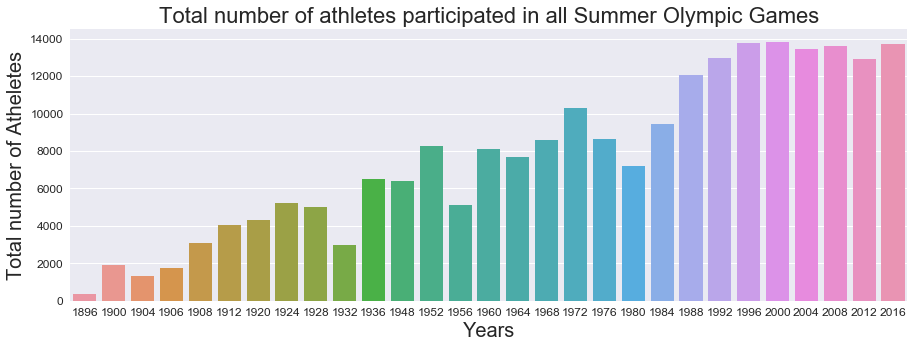

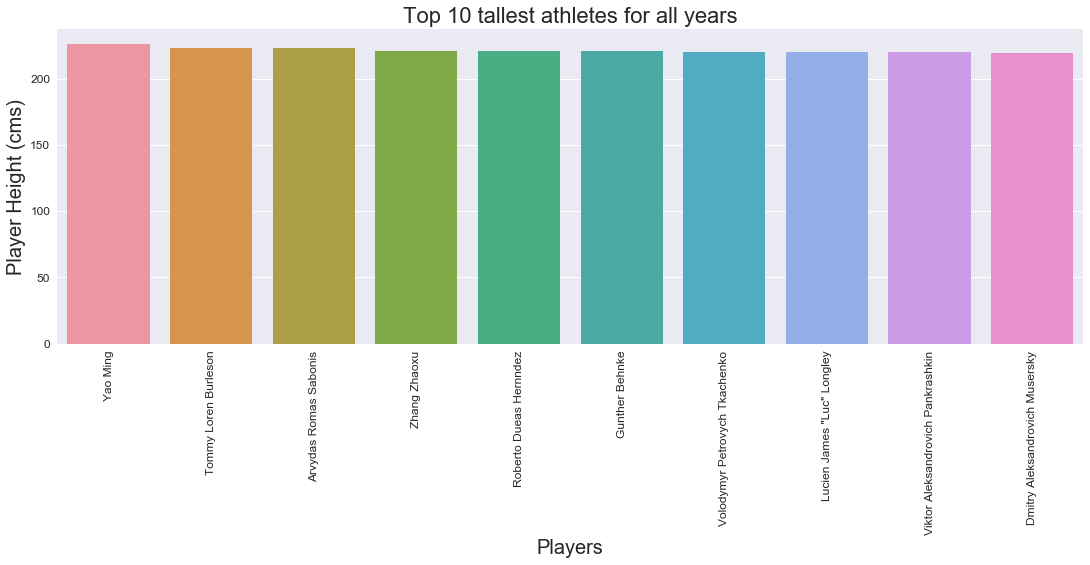

In [7]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

# 15 points
# Task 3-a: Draw a histogram for total number of athletes participated in all Summer Olympic Games. 
# Think of a way to nicely visualize the all years of Summer Olympics! 
#########################begin code for Task 3-a
sns.set_style('whitegrid')
sns.set(font_scale = 1.5)
sns.set(color_codes=True)
f, ax = plt.subplots(figsize=(15,5))
summeratheletes = df_olympics[(df_olympics['Season'] == 'Summer')].groupby(['Year']).size().reset_index(name='TotalCount')
a = sns.barplot(x=summeratheletes['Year'], y=summeratheletes['TotalCount'] , data=df_olympics)
plt.xlabel('Years', fontsize=20)
plt.ylabel('Total number of Atheletes', fontsize=20)
plt.title('Total number of athletes participated in all Summer Olympic Games', fontsize=22)
plt.tick_params(labelsize=12)
#########################end code for Task 3-a

# 15 points
# Task 3-b: Draw a "vertical" bar chart that lists the top-10 talest althlets for all years.
# Remember to make the bar chart into a vertical bar chart
#########################begin code for Task 3-b 
sns.set_style('whitegrid')
sns.set(font_scale = 1.5)
sns.set(color_codes=True)
f, ax = plt.subplots(figsize=(15,5))
plt.tight_layout()
height_chart = df_olympics.sort_values('Height',ascending=False).drop_duplicates(subset="ID",keep='first').head(10)
h = sns.barplot(x=height_chart['Name'] , y=height_chart['Height'], data=height_chart)
plt.xlabel('Players', fontsize=20)
plt.ylabel('Player Height (cms)', fontsize=20)
plt.title('Top 10 tallest athletes for all years', fontsize=22)
plt.tick_params(labelsize=12)
plt.xticks(rotation=90)
#########################end code for Task 3-b

\# Task 4: 
Find out an 'interesting' information from your Olympic History dataset. Create a visualization for it and explain in a few lines your reasoning. 

This task is worth 20 points. Your result will be judged based on the uniqueness and quality of your work (having a meaningful result and an aesthetic visualization). 

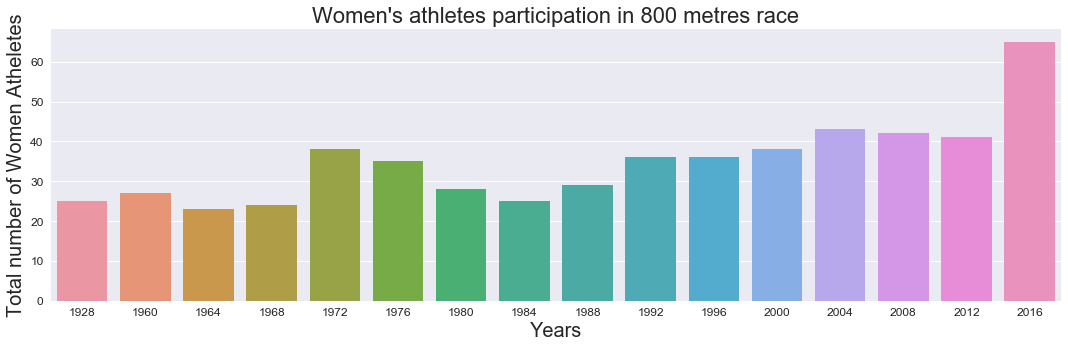

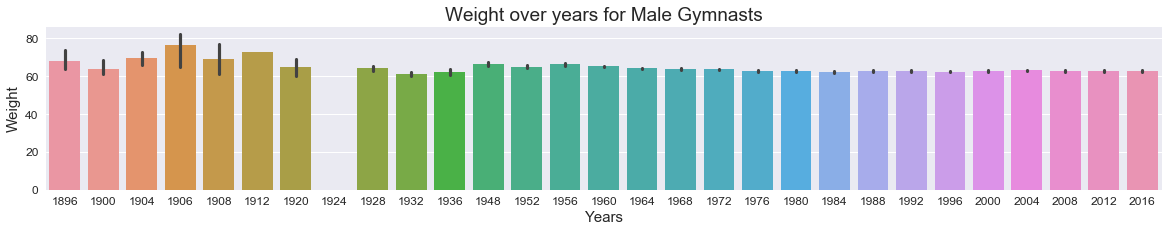

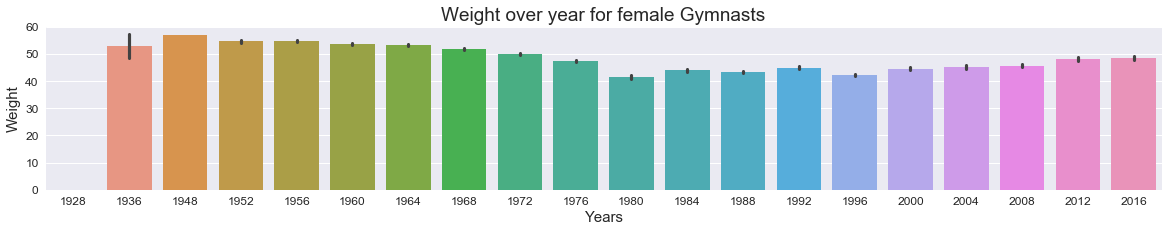

In [106]:
#########################begin code for Task 4
sns.set_style('whitegrid')
sns.set(font_scale = 1.5)
sns.set(color_codes=True)
f, ax = plt.subplots(figsize=(15,5))
x = np.linspace(1,1)
summeratheletes = df_olympics[(df_olympics['Event'] == "Athletics Women's 800 metres")].groupby(['Year']).size().reset_index(name='WomenRace')
a = sns.barplot(x=summeratheletes['Year'], y=summeratheletes['WomenRace'] , data=df_olympics)
plt.xlabel('Years', fontsize=20)
plt.ylabel('Total number of Women Atheletes', fontsize=20)
plt.title("Women's athletes participation in 800 metres race", fontsize=22)
plt.tick_params(labelsize=12)
####

sns.set_style('whitegrid')
sns.set(font_scale = 1.5)
sns.set(color_codes=True)
plt.tight_layout()
f, ax = plt.subplots(figsize=(20,3))
malegym = df_olympics[(df_olympics['Sport'] == "Gymnastics") & (df_olympics.Sex == "M")]
womengym = df_olympics[(df_olympics['Sport'] == "Gymnastics") & (df_olympics.Sex == "F")]
b = sns.barplot(x=malegym['Year'], y=malegym['Weight'], data=df_olympics)
plt.title('Weight over years for Male Gymnasts',fontsize=19)
plt.xlabel('Years', fontsize=15)
plt.ylabel('Weight', fontsize=15)
plt.tick_params(labelsize=12)
####
sns.set_style('whitegrid')
sns.set(font_scale = 1.5)
sns.set(color_codes=True)
f, ax = plt.subplots(figsize=(20,3))
b = sns.barplot(x=womengym['Year'], y=womengym['Weight'], data=df_olympics)
plt.title('Weight over year for female Gymnasts',fontsize=19)
plt.xlabel('Years', fontsize=15)
plt.ylabel('Weight', fontsize=15)
plt.tick_params(labelsize=12)
#########################end code for Task 4

In [ ]:
# After thorough analyzing Athelete events of over 120 years, I am able to fetch out few of the information as stated below
# 1. Here, as we can see, the first time women were able to participate in Women's athletes participation in 800 metres race was in 1928
# 2. After 1928 uptill 1960 women's were prohibited (hence data missing) to take part in 800 metre race as because while performing in 1928,
# organizers found that women are getting exhausted after running for half of the race, hence, only after 1960 the ban was lifted after women won the fight for equality.
# 3. From the year 1964, the weight for male is quite stable.
# 4. Taking an average of weight for female gymnasts, we can see that the there is a weight reduction from 60 to 50 kg in the later period.
# 4. Weight data missing for 1924 for men and 1928 for women respectively.